# <a href="https://thetahat.ru/courses/ad">Введение в анализ данных</a>


## PyTorch и полносвязные нейронные сети

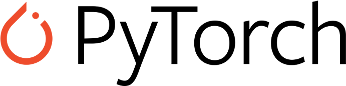

### 1. Введение

В данном ноутбуке мы будем пользоваться фреймворком **PyTorch**, который предназначен для работы с нейронными сетями. Как установить `torch` можно прочитать <a href="http://pytorch.org/" target="_blank">на официальном сайте PyTorch</a>. Для этого выберите свою OS, и вам будет показана нужная команда для ввода в терминале.

Больше подробностей о том, как работает `torch`, будет рассказано на 3 курсе.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import clear_output

sns.set(palette="Set2")

import torch
from torch import nn

print(torch.__version__)

2.6.0+cu124


#### 1.1 Сравнение NumPy и PyTorch-синтаксиса
Интерфейс `torch` написан подобно <a href="https://miptstats.github.io/courses/python/05_numpy.html" target="_blank">интерфейсу</a> `numpy` для удобства использования. Главное различие между ними в том, что `numpy` оперирует `numpy.ndarray` массивами, а `torch` &mdash; тензорами `torch.Tensor`. Тензор в `torch`, как и массив в `numpy` представляет собой многомерную матрицу с элементами одного типа данных. Напишем одни и те же операции на `numpy` и `torch`.

**numpy**

In [2]:
x = np.arange(16).reshape(4, 4)

print(f"Матрица X:\n{x}\n")
print(f"Размер: {x.shape}\n")
print(f"Добавление константы:\n{x + 5}\n")
print(f"X*X^T:\n{np.dot(x, x.T)}\n")
print(f"Среднее по колонкам:\n{x.mean(axis=-1)}\n")
print(f"Кумулятивная сумма по колонкам:\n{np.cumsum(x, axis=0)}\n")

Матрица X:
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]

Размер: (4, 4)

Добавление константы:
[[ 5  6  7  8]
 [ 9 10 11 12]
 [13 14 15 16]
 [17 18 19 20]]

X*X^T:
[[ 14  38  62  86]
 [ 38 126 214 302]
 [ 62 214 366 518]
 [ 86 302 518 734]]

Среднее по колонкам:
[ 1.5  5.5  9.5 13.5]

Кумулятивная сумма по колонкам:
[[ 0  1  2  3]
 [ 4  6  8 10]
 [12 15 18 21]
 [24 28 32 36]]



**pytorch**

In [3]:
x = np.arange(16).reshape(4, 4)
x = torch.tensor(x, dtype=torch.float32)  # или torch.arange(0,16).view(4,4)

print(f"Матрица X:\n{x}")
print(f"Размер: {x.shape}\n")
print(f"Добавление константы:\n{x + 5}")
print(f"X*X^T:\n{torch.matmul(x, x.transpose(1, 0))}")  # кратко: x.mm(x.t())
print(f"Среднее по колонкам:\n{torch.mean(x, dim=-1)}")
print(f"Кумулятивная сумма по колонкам:\n{torch.cumsum(x, dim=0)}")

Матрица X:
tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.],
        [12., 13., 14., 15.]])
Размер: torch.Size([4, 4])

Добавление константы:
tensor([[ 5.,  6.,  7.,  8.],
        [ 9., 10., 11., 12.],
        [13., 14., 15., 16.],
        [17., 18., 19., 20.]])
X*X^T:
tensor([[ 14.,  38.,  62.,  86.],
        [ 38., 126., 214., 302.],
        [ 62., 214., 366., 518.],
        [ 86., 302., 518., 734.]])
Среднее по колонкам:
tensor([ 1.5000,  5.5000,  9.5000, 13.5000])
Кумулятивная сумма по колонкам:
tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  6.,  8., 10.],
        [12., 15., 18., 21.],
        [24., 28., 32., 36.]])


Все же некоторые названия методов отличаются от методов `numpy`. Полной совместимости с `numpy` по-прежнему нет, но с обновлениями разрыв постепенно сокращался. Однако последние изменения были не столь значительными, так что необходимость заново запоминать новые названия встречается реже.

Например, PyTorch использует другое написание стандартных типов:  
* `x.astype('int64') -> x.type(torch.LongTensor)`

Для более детального сравнения можно воспользоваться <a href="https://github.com/torch/torch7/wiki/Torch-for-Numpy-users" target="_blank">таблицей</a> перевода методов из `numpy` в `torch` или обратиться к <a href="http://pytorch.org/docs/master/" target="_blank">официальной документации</a>. Если же возникают сложности, полезно заглянуть на <a href="https://discuss.pytorch.org/" target="_blank">форумы PyTorch</a>.


#### 1.2 NumPy <-> PyTorch
Можно переводить `numpy`-массив в `torch`-тензор и наоборот.
Например, чтобы сделать из `numpy`-массива `torch`-тензор, можно поступить следующим образом

In [4]:
# зададим numpy массив
x_np = np.array([2, 5, 7, 1])

# 1-й способ
x_torch = torch.tensor(x_np)
print(type(x_torch), x_torch)

# 2-й способ
x_torch = torch.from_numpy(x_np)
print(type(x_torch), x_torch)

<class 'torch.Tensor'> tensor([2, 5, 7, 1])
<class 'torch.Tensor'> tensor([2, 5, 7, 1])


Аналогично и с переводом обратно: функция `x.numpy()` переведет `torch`-тензор `x` в `numpy`-массив, причем типы переведутся соответственно <a href="https://github.com/torch/torch7/wiki/Torch-for-Numpy-users" target="_blank">табличке</a>.

In [5]:
x_np = x_torch.numpy()
print(type(x_np), x_np)

<class 'numpy.ndarray'> [2 5 7 1]


#### 1.3 Еще один пример
Нарисуем по сетке данную кривую на графике, используя `torch`:

$$x(t) = 2 \cos t + \sin 2t \cos 60t,$$

$$y(t) = \sin 2t + \sin 60t.$$

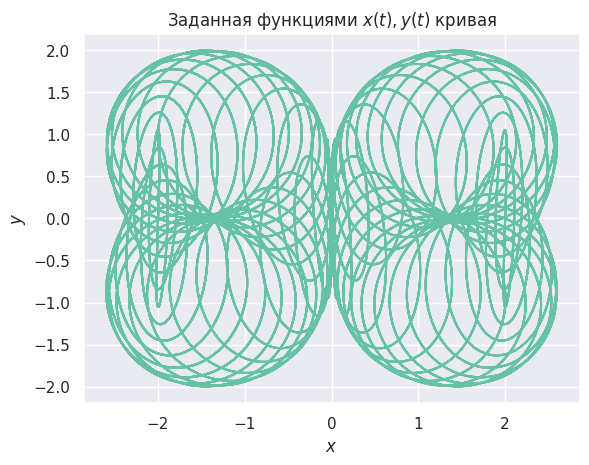

In [6]:
t = torch.linspace(-10, 10, steps=10000)
x = 2 * torch.cos(t) + torch.sin(2 * t) * torch.cos(60 * t)
y = torch.sin(2 * t) + torch.sin(60 * t)

plt.plot(x, y)
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.title("Заданная функциями $x(t), y(t)$ кривая")
plt.show()

Заметим, что библиотека `matplotlib` справляется с отображением `pytorch`-тензоров, и дополнительных преобразований делать не нужно.



### 2. Простой пример обучения нейронной сети

#### 2.1 Цикл обучения модели

Пусть задана нейронная сеть $y_\theta(x)$, параметризуемая обучаемыми параметрами $\theta$.
Для обучения модели необходимо задать оптимизируемую функцию (функцию ошибки, лосс) $\mathscr{L}(\theta)$, которую следует минимизировать.


Процесс обучения происходит следующим образом.
 * **Прямой проход / Forward pass:** <br>
     Вычисляем $\widehat{Y}_i = y_\theta(x_i)$ для входных данных $x$ для текущего значения параметров $\theta$.
 * **Вычисление оптимизируемой функции:**<br>
     Вычисляем оптимизируемую функцию $\mathscr{L}(\theta)$.
 * **Обратный проход / Backward pass:** <br>
     Считаем градиенты по всем обучаемым параметрам $\nabla_\theta \mathscr{L}$.
 * **Шаг оптимизации:** <br>
     Делаем шаг градиентного спуска, обновляя все обучаемые параметры.

#### 2.2 Линейная регрессия

На лекции было показано, что линейную регрессию можно представить как частный случай нейрона с тождественной функцией активации.
Сделаем одномерную линейную регрессию на датасете <a href="http://lib.stat.cmu.edu/datasets/boston" target="_blank">boston</a>. Этот датасет представляет собой набор данных конца 70-х годов прошлого века для предсказания цены недвижимости в Бостоне.

Скачаем данные.

In [7]:
# ссылка для скачивания данных
data_url = "http://lib.stat.cmu.edu/datasets/boston"

# собираем таблицу данных
raw_df = pd.read_csv(data_url, sep=r"\s+", skiprows=22, header=None)

# выделяем признаки и таргет
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

Будем рассматривать зависимость таргета (медианная стоимость домов в тысячах долларов) от последнего признака (процент населения людей с низким уровнем дохода).

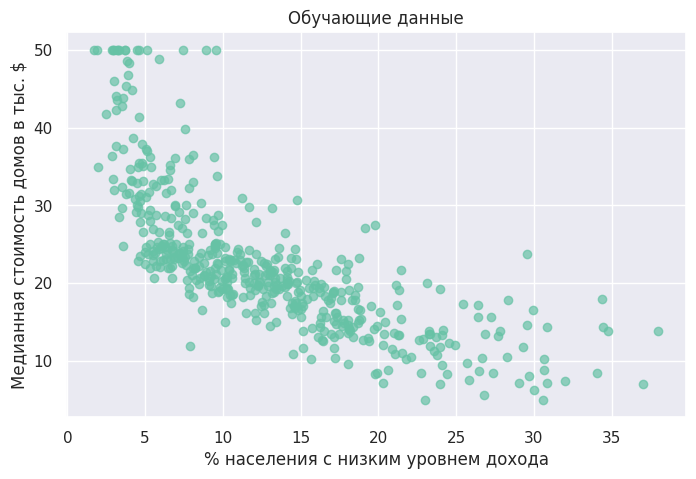

In [8]:
plt.figure(figsize=(8, 5))
plt.scatter(data[:, -1], target, alpha=0.7)
plt.xlabel("% населения с низким уровнем дохода")
plt.ylabel("Медианная стоимость домов в тыс. $")
plt.title("Обучающие данные");

В данном случае предсказание модели задается следующим образом: $$\widehat{y}(x) = xw + b,$$
где $w, b \in \mathbb{R}$ &mdash; обучаемые параметры модели. Это обычная линейная модель, и с ней мы уже работали <a href="https://thetahat.ru/courses/ad/main/3/ad_linreg_sklearn" target="_blank">ранее</a>.

Объявляем обучаемые параметры. Также задаем признак $X$ и таргет $Y$ в виде `torch`-тензоров.

In [9]:
# создаем два тензора размера 1 с заполнением нулями,
# для которых будут вычисляться градиенты
w = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)

# Данные оборачиваем в тензоры, по которым не требуем вычисления градиента
x = torch.FloatTensor(data[:, -1] / 10)
y = torch.FloatTensor(target)

# по-другому:
# x = torch.tensor(boston.data[:, -1] / 10, dtype=torch.float32)
# y = torch.tensor(boston.target, dtype=torch.float32)

In [10]:
print(x.shape)
print(y.shape)

torch.Size([506])
torch.Size([506])


Зададим оптимизируемую функцию / функцию ошибки / лосс &mdash; <a href="https://miptstats.github.io/courses/ad_fivt/linreg_sklearn.html#3.-Тестирование-и-оценка-качества" target="_blank">MSE</a>:

$$
\mathrm{MSE} = \frac{1}{n} \sum_{i=1}^n \left(\widehat{Y}_i - Y_i\right)^2.
$$


In [11]:
def optim_func(y_pred, y_true):
    return torch.mean((y_pred - y_true) ** 2)

После того как мы вычислим результат применения этой функции к нашим данным, нам потребуется посчитать градиенты для всех обучаемых параметров. Это необходимо для выполнения шага градиентного спуска.

Для этого мы можем воспользоваться функцией `backward`. Вызов `backward` для результата вычисления функции ошибки `loss` позволит нам выполнить обратный проход по всему графу вычислений и рассчитать градиенты лосса по всем обучаемым параметрам.

In [12]:
# Прямой проход
y_pred = x * w + b

# Вычисление лосса
loss = optim_func(y_pred, y)

# Вычисление градиентов
# с помощью обратного прохода по сети
# и сохранение их в памяти сети
loss.backward()

Здесь `loss` &mdash; значение функции MSE, вычисленное на этой итерации.

In [13]:
loss

tensor(592.1469, grad_fn=<MeanBackward0>)

К градиентам для обучаемых параметров, для которых `requires_grad=True`, теперь можно обратиться следующим образом:

In [14]:
print("dL/dw =", w.grad)
print("dL/b =", b.grad)

dL/dw = tensor([-47.3514])
dL/b = tensor([-45.0656])


Если мы посчитаем градиент $M$ раз, то есть $M$ раз вызовем `loss.backward()`, то градиент будет накапливаться (суммироваться) в параметрах, требующих градиента. Иногда это бывает удобно.

Убедимся на примере, что именно так все и работает.

In [15]:
y_pred = x * w + b
loss = optim_func(y_pred, y)
loss.backward()

print("dL/dw =", w.grad)
print("dL/b =", b.grad)

dL/dw = tensor([-94.7029])
dL/b = tensor([-90.1312])


Видим, что значения градиентов стали в 2 раза больше, за счет того, что мы сложили одни и те же градиенты 2 раза.

Если же мы не хотим, чтобы градиенты суммировались, то нужно **занулять
градиенты** между итерациями после того как сделали шаг градиентного спуска.
Это можно сделать с помощью функции `zero_` для градиентов.


In [16]:
w.grad.zero_()
b.grad.zero_()
w.grad, b.grad

(tensor([0.]), tensor([0.]))

Соберем в **единый пайплайн весь рассмотренный выше процесс** для совершения нескольких итераций обучения. Также напишем функцию визуализации процесса обучения.

In [17]:
def show_progress(
    x: torch.Tensor, y: torch.Tensor, y_pred: torch.Tensor, loss: torch.Tensor
) -> None:
    """Визуализация процесса обучения.

    Параметры: 
    x (torch.Tensor): объекты обучающей выборки;
    y (torch.Tensor): таргеты обучающей выборки;
    y_pred (torch.Tensor): предсказания модели;
    loss (torch.Tensor): текущее значение ошибки модели.
    """

    # Открепим переменную от вычислительного графа перед отрисовкой графика
    y_pred = y_pred.detach()

    # Превратим тензор размерности 0 в число
    loss = loss.item()

    # Стираем предыдущий вывод в тот момент, когда появится следующий
    clear_output(wait=True)

    # Строим новый график
    plt.figure(figsize=(8, 5))
    plt.scatter(x, y, alpha=0.75, label="Обучающая выборка")
    plt.scatter(x, y_pred, color="orange", linewidth=5, label="Предсказания")
    plt.xlabel("% населения с низким уровнем дохода")
    plt.ylabel("Медианная стоимость домов в тыс. $")
    plt.title("Процесс обучения модели в интерактиве")
    plt.legend()
    plt.show()

    print(f"MSE = {loss:.3f}")

В данном случае параметр `w` отвечает за наклон линии, а параметр `b` только лишь сдвигает её. На практике параметр `b` можно менять более "агрессивно", не опасаясь нарушить стабильность обучения.

Давайте установим скорость обучения (learning rate, `lr`) для параметра `b` больше, чем для `w`. Использование различных `lr` помогает ускорить сходимость модели и избежать ситуаций, когда один параметр обновляется слишком медленно, а другой — слишком быстро. В современных оптимизаторах эта регулировка осуществляется автоматически.

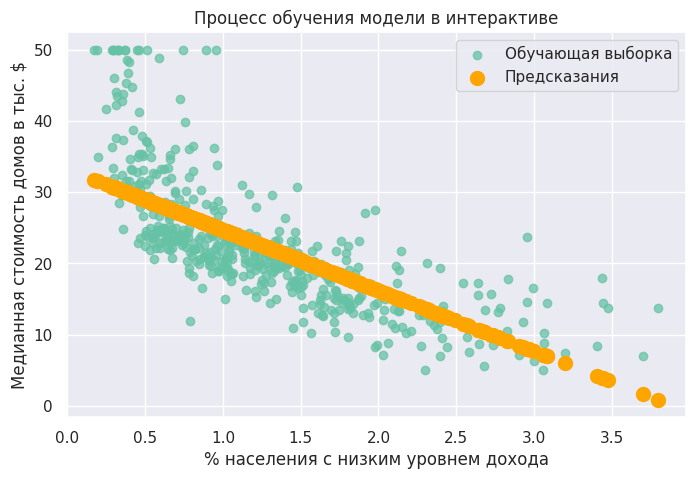

MSE = 38.978
Готово!


In [18]:
# Инициализация параметров
w = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)

# Количество итераций
num_iter = 1_000

# Скорость обучения для параметров
lr_w = 0.01
lr_b = 0.05

for i in range(num_iter):

    # Forward pass: предсказание модели
    y_pred = x * w + b

    # Вычисление оптимизируемой функции (MSE)
    loss = optim_func(y_pred, y)

    # Обратный проход: вычисление градиентов
    loss.backward()

    # Оптимизация: обновление параметров
    w.data -= lr_w * w.grad.data
    b.data -= lr_b * b.grad.data

    # Зануление градиентов
    w.grad.zero_()
    b.grad.zero_()

    # График + вывод MSE через каждые 5 итераций
    if (i + 1) % 5 == 0:
        show_progress(x, y, y_pred, loss)

        if loss.item() < 39:
            print("Готово!")
            break

#### 2.3 Двухслойная модель

Попробуем усложнить модель, добавив еще один слой. Тем самым модель примет следующий вид

$$\widehat{y}(x) = u(x) w_2 + b_2,$$

$$u(x) = \sigma(xw_1 + b_1),$$

$$\sigma(x) = \text{ReLU}(x) = \begin{equation*}\begin{cases}x, \; x \ge 0, \\ 0, \; \text{иначе,} \end{cases} \end{equation*}$$

$w_1, b_1 \in \mathbb{R}$ &mdash; обучаемые параметры первого слоя, $w_2, b_2 \in \mathbb{R}$ &mdash; обучаемые параметры второго слоя, $\sigma(x)$ &mdash; функция активации, в данном случае `ReLU`. Можно заметить, что эта функция не удовлетворяет условиям теоремы Цыбенко, тем не менее на практике она часто применяется для нейронных сетей.

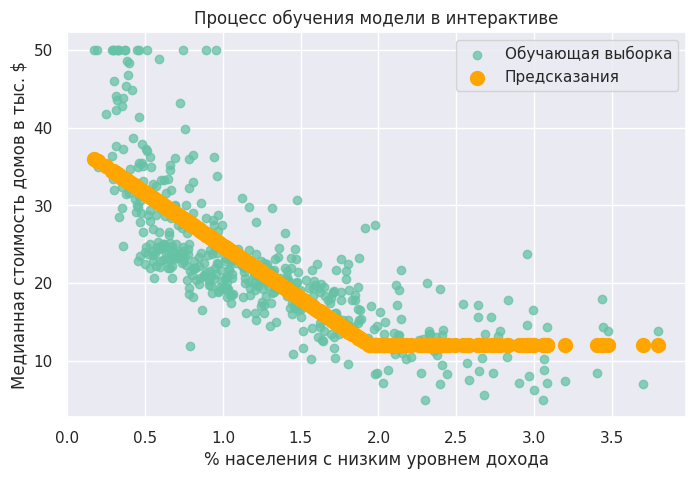

MSE = 32.994
Готово!


In [19]:
# Инициализация параметров
w1 = torch.ones(1, requires_grad=True)
b1 = torch.ones(1, requires_grad=True)
w2 = torch.ones(1, requires_grad=True)
b2 = torch.ones(1, requires_grad=True)

# Функция активации


def act_func(x):
    return x * (x >= 0)


# Количество итераций
num_iter = 1_000

# Скорость обучения для параметров
lr_w = 0.01
lr_b = 0.05

for i in range(num_iter):

    # Forward pass: предсказание модели
    y_pred = act_func(x * w1 + b1) * w2 + b2

    # Вычисление оптимизируемой функции (MSE)
    loss = optim_func(y_pred, y)

    # Bakcward pass: вычисление градиентов
    loss.backward()

    # Оптимизация: обновление параметров
    w1.data -= lr_w * w1.grad.data
    b1.data -= lr_b * b1.grad.data
    w2.data -= lr_w * w2.grad.data
    b2.data -= lr_b * b2.grad.data

    # Зануление градиентов
    w1.grad.zero_()
    b1.grad.zero_()
    w2.grad.zero_()
    b2.grad.zero_()

    # График + вывод MSE через каждые 5 итераций
    if (i + 1) % 5 == 0:
        show_progress(x, y, y_pred, loss)

        if loss.item() < 33:
            print("Готово!")
            break

Полученная модель более точно описывает данные, так как лосс стал меньше, а функция, которая получилась на выходе модели, оказалась ближе к точкам из исходных данных на графике. Этот эффект был достигнут благодаря добавлению нелинейности в модель.

### 3. Готовые модули из PyTorch

На практике нейронные сети так не пишут и не обучают, вместо этого пользуются готовыми модулями. Напишем такую же нейросеть, но теперь с помощью `torch`. Для этого будем пользоваться `torch.nn`.

Воспользуемся следующими модулями:

* `nn.Sequential` &mdash; модуль для соединения модулей последовательно, друг за другом;
* `nn.Linear` &mdash; модуль линейного слоя (без функции активации);
* `nn.ReLU` &mdash; модуль функции активации ReLU.

In [20]:
# собираем модули в последовательность
model = nn.Sequential(
    # кол-во признаков во входном слое 1, в выходном тоже 1
    nn.Linear(in_features=1, out_features=1),
    # та же ф-ция активации, что и раньше, только из pytorch
    nn.ReLU(),
    # кол-во признаков во входном слое 1, в выходном тоже 1
    nn.Linear(in_features=1, out_features=1),
)

model

Sequential(
  (0): Linear(in_features=1, out_features=1, bias=True)
  (1): ReLU()
  (2): Linear(in_features=1, out_features=1, bias=True)
)

Для того, чтобы работать с данной моделью, нам необходимо поменять размерность `x` и `y`.

In [21]:
x_new = x.reshape(-1, 1)
y_new = y.reshape(-1, 1)

print("Было:", x.shape, y.shape)
print("Стало:", x_new.shape, y_new.shape)

Было: torch.Size([506]) torch.Size([506])
Стало: torch.Size([506, 1]) torch.Size([506, 1])


Применим модель к нашим данным и посмотрим на результаты для первых 10 элементов.

In [22]:
model(x_new)[:10]

tensor([[0.9822],
        [0.9822],
        [0.9822],
        [0.9822],
        [0.9822],
        [0.9822],
        [0.9822],
        [0.9822],
        [0.9822],
        [0.9822]], grad_fn=<SliceBackward0>)

Посмотрим на обучаемые параметры модели с помощью функции `named_parameters`, которая выдает названия параметров и их значения.

* Имена `0.weight` и `0.bias` соответствуют весу $w_1$ и сдвигу $b_1$ первого Linear-слоя.
* Имена `2.weight` и `2.bias` соответствуют весу $w_2$ и сдвигу $b_2$ второго Linear-слоя.




In [23]:
for name, param in model.named_parameters():
    print(name)
    print(param.data)

0.weight
tensor([[-0.6124]])
0.bias
tensor([-0.7782])
2.weight
tensor([[-0.5408]])
2.bias
tensor([0.9822])


&#x2753; **Вопрос** &#x2753;


> Почему после 0 идет сразу 2 в данном выводе `named_parameters`?



<details>
 <summary> Кликни для показа ответа </summary>

> $0$-й и $2$-й модули в модели представлены линейными слоями, а $1$-й модуль &mdash; функцией активации, у которой нет обучаемых параметров.

</details><br/>

Инициализируем параметры так же, как мы делали для подобной модели ранее. На этот раз воспользуемся функцией `parameters`, она возвращает только параметры.

In [24]:
for p in model.parameters():
    p.data = torch.FloatTensor([[1]])
    print(p.data)

tensor([[1.]])
tensor([[1.]])
tensor([[1.]])
tensor([[1.]])


Ранее мы производили оптимизацию самостоятельно. Теперь же сделаем это с помощью оптимизатора `SGD` из `torch`, который реализует *стохастический градиентный спуск*. Он принимает на вход
* параметры модели, которые мы можем получить, вызвав метод `parameters` у модели,
* скорость обучения `lr`, которую мы обозначали ранее как $\eta$.

У оптимизатора есть возможность задать некоторые другие аргументы, но их мы рассмотрим уже на 3 курсе.

Установим скорость обучения на уровне $0.01$ для всех параметров сразу. Также заменим нашу написанную `MSE` функцию на соответствующую из `torch`.

In [25]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
optim_func = nn.MSELoss()

Обучим полученную модель на наших данных. Теперь обновления значений параметров происходят с помощью вызова `optimzer.step()`, а зануление градиентов &mdash; с помощью `optimizer.zero_grad()`.

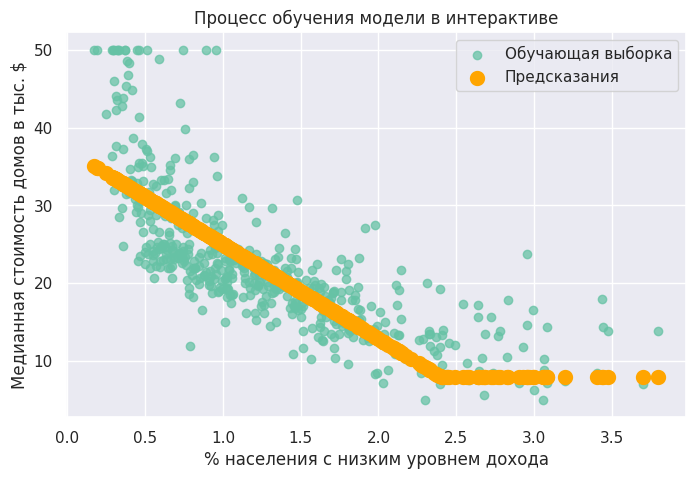

MSE = 34.986
Готово!


In [26]:
# Количество итераций
num_iter = 10_000

for i in range(num_iter):

    # Forward pass: предсказание модели по данным x_new
    y_pred = model(x_new)

    # Вычисление оптимизируемой функции (MSE) по предсказаниям
    loss = optim_func(y_pred, y_new)

    # Bakcward pass: вычисление градиентов оптимизируемой функции
    # по всем параметрам модели
    loss.backward()

    # Оптимизация: обновление параметров по формулам соответствующего
    # метода оптимизации, используются вычисленные ранее градиенты
    optimizer.step()

    # Зануление градиентов
    optimizer.zero_grad()

    # График + вывод MSE через каждые 5 итераций
    if (i + 1) % 5 == 0:
        show_progress(x, y, y_pred, loss)

        if loss.item() < 35:
            print("Готово!")
            break

&#x2753; **Вопрос** &#x2753;

> Как <code>optimizer.step()</code> использует вычисленные в <code>loss.backward()</code> градиенты?

<details>
 <summary>Кликни для показа ответа</summary>

> * <p><code>loss.backward()</code> вычисляет градиенты функции потерь по параметрам модели и сохраняет их в <code>.grad</code> соответствующих тензоров, таких как <code>model[0].weight.grad</code>, <code>model[0].bias.grad</code> и т. д.</p>
>
> * <p><code>optimizer.step()</code> затем обновляет параметры модели, используя сохраненные градиенты и заданные гиперпараметры (например, скорость обучения) в соответствии с выбранным методом оптимизации.</p>

</details><br/>


Полученная модель довольно хорошо приближает данные, однако дольше сходится к оптимуму за счет меньшей скорости обучения для параметров сдвига.

#### 3.1 Улучшение модели

Увеличим количество слоев до трех и добавим нейронов в каждый из них.

In [27]:
# собираем модули в последовательность
model = nn.Sequential(
    nn.Linear(in_features=1, out_features=16),
    nn.ReLU(),
    nn.Linear(in_features=16, out_features=32),
    nn.ReLU(),
    nn.Linear(in_features=32, out_features=1),
)

model

Sequential(
  (0): Linear(in_features=1, out_features=16, bias=True)
  (1): ReLU()
  (2): Linear(in_features=16, out_features=32, bias=True)
  (3): ReLU()
  (4): Linear(in_features=32, out_features=1, bias=True)
)

&#x2753; **Вопрос** &#x2753;

> Какой размер у матрицы весов и вектора сдвигов второго слоя?

<details>
 <summary>Кликни для показа ответа</summary>

> * `(16, 32)` у весов $W$;
> * `(32,)` у сдвига $b$.

</details><br/>


Все веса инициализируем случайно значениями из отрезка $[-0.1, 0.1]$, а все сдвиги &mdash; нулями.

In [28]:
for name, param in model.named_parameters():
    if "weight" in name:
        nn.init.uniform_(param, a=-0.1, b=0.1)
    elif "bias" in name:
        nn.init.constant_(param, 0.0)

По аналогии с реализацией в пункте 2 сделаем learning rate разным для весов и для сдвигов.

In [29]:
param_groups = [
    {"params": [p for name, p in model.named_parameters() if "weight" in name], "lr": 0.01},
    {"params": [p for name, p in model.named_parameters() if "bias" in name], "lr": 0.05},
]

optimizer = torch.optim.SGD(params=param_groups)
loss_function = nn.MSELoss()

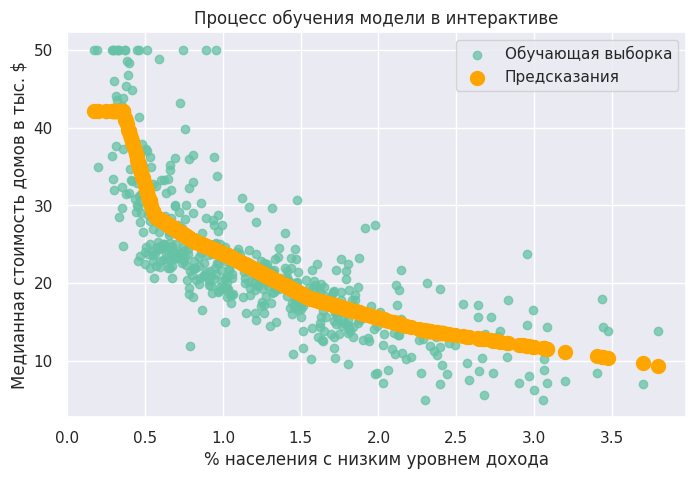

MSE = 26.747
Готово!


In [30]:
# Количество итераций
num_iter = 10_000

for i in range(num_iter):

    # Forward pass: предсказание модели по данным x_new
    y_pred = model(x_new)

    # Вычисление оптимизируемой функции (MSE) по предсказаниям
    loss = optim_func(y_pred, y_new)

    # Bakcward pass: вычисление градиентов оптимизируемой функции
    # по всем параметрам модели
    loss.backward()

    # Оптимизация: обновление параметров по формулам соответствующего
    # метода оптимизации, используются вычисленные ранее градиенты
    optimizer.step()

    # Зануление градиентов
    optimizer.zero_grad()

    # График + вывод MSE через каждые 5 итераций
    if (i + 1) % 5 == 0:
        show_progress(x, y, y_pred, loss)

        if loss.item() < 27:
            print("Готово!")
            break

Получили более точное приближение данных и меньшую ошибку MSE.


Далее мы <a href="https://thetahat.ru/courses/ad/main/4/nn_complex_examples">посмотрим</a> примеры применения нейронных сетей на практике.